# 1 - analyse exploratoire des données
---

**Import des dépendances et des données**

In [1]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filename_path = 'data/2015-building-energy-benchmarking.csv'
data_2015 = pd.read_csv(filename_path)

filename_path = 'data/2016-building-energy-benchmarking.csv'
data_2016 = pd.read_csv(filename_path)

**Import des fonctions**

In [2]:
####
#Retourne une serie comportant le pourcentage de valeurs manquantes pour chaques colonnes du dataframe
def percentage_nan_by_columns(df):
    s = df.isnull().sum(axis = 0) / df.shape[0] * 100.00
    s = s.sort_values()
    s = s.transform(lambda x: '{:02.2f}'.format(x)+' %')
    return s

**Paramètres divers**

In [3]:
pd.set_option('display.max_columns', 47)

**Observer les données**

**2015**
- variables cibles : ['SiteEnergyUseWN(kBtu)'	, 'GHGEmissions(MetricTonsCO2e)']
- lignes, colonnes : (3340, 47)
- types de variables :
(float64,23) ,
(object,15),
(int64,9)
- valeurs manquantes : >50 %   
['SecondLargestPropertyUseType',   
'SecondLargestPropertyUseTypeGFA',   
'ThirdLargestPropertyUseType',   
'ThirdLargestPropertyUseTypeGFA',   
'2010 Census Tracts',   
'City Council Districts',   
'YearsENERGYSTARCertified',   
'Outlier',    
'Comment'   ]

**2016**
- variables cibles : SiteEnergyUseWN(kBtu)	, TotalGHGEmissions
- lignes, colonnes : (3376, 46)
- types de variables :
(float64,22) ,
(object,15),
(int64,8),
(bool,1)
- valeurs manquantes :  >50 %   
['SecondLargestPropertyUseTypeGFA',   
'SecondLargestPropertyUseType',   
'ThirdLargestPropertyUseTypeGFA',   
'ThirdLargestPropertyUseType',           
'YearsENERGYSTARCertified',   
'Outlier',   
Comments']   

In [4]:
df15 = data_2015.copy()
df16 = data_2016.copy()

In [5]:
print(df15.shape)
print(df16.shape)

(3340, 47)
(3376, 46)


In [6]:
print(df15.dtypes.value_counts())
print(df16.dtypes.value_counts())

float64    23
object     15
int64       9
dtype: int64
float64    22
object     15
int64       8
bool        1
dtype: int64


In [7]:
df15.sample(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
1697,23098,2015,NonResidential,Supermarket/Grocery Store,HILLTOP RED APPLE MARKET,3086003145,"{'latitude': '47.57898152', 'longitude': '-122...",2,GREATER DUWAMISH,1965,1,1.0,21603,0,21603,Supermarket/Grocery Store,Supermarket/Grocery Store,21603.0,NaN,NaN,NaN,NaN,NaN,16.0,268.8,276.3,678.3,672.0,5807879.0,5967914.0,0.0,1199824.0,4093969.0,17141.0,1714078.0,0.0,119.57,4.72,No,NaN,Compliant,NaN,NaN,42.0,NaN,41.0,17919
665,19491,2015,Campus,Other,PACIFIC MULTIFORMS INC - CAMPUS,5200056,"{'latitude': '47.54261556', 'longitude': '-122...",2,GREATER DUWAMISH,1994,1,1.0,22800,0,22800,Manufacturing/Industrial Plant,Manufacturing/Industrial Plant,22800.0,NaN,NaN,NaN,NaN,NaN,NaN,85.6,102.1,111.4,128.8,1951448.0,2328874.0,0.0,68997.0,235427.0,17160.0,1716031.0,0.0,92.78,4.02,No,NaN,Compliant,NaN,NaN,58.0,NaN,37.0,18388
1975,23937,2015,Multifamily MR (5-9),Mid-Rise Multifamily,MAGNUSON POINTE CONDOS,5045000000,"{'latitude': '47.68271723', 'longitude': '-122...",4,NORTHEAST,1979,1,5.0,91560,0,91560,Multifamily Housing,Multifamily Housing,91560.0,NaN,NaN,NaN,NaN,NaN,76.0,27.4,30.7,86.1,96.4,2509232.0,2810977.0,0.0,735414.0,2509336.0,0.0,0.0,0.0,17.49,0.07,No,NaN,Compliant,NaN,NaN,55.0,NaN,48.0,18792


In [8]:
df16.sample(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
2375,25435,2016,Multifamily LR (1-4),Low-Rise Multifamily,Daystar Retirement Village,2615 SW Barton Street,Seattle,WA,98126.0,6882300020,1,DELRIDGE,47.51996,-122.36712,1990,1.0,2,89549,0,89549,Multifamily Housing,Multifamily Housing,89549.0,NaN,NaN,NaN,NaN,NaN,31.0,40.099998,42.400002,105.199997,111.099999,3591653.000,3.793748e+06,0.0,792125.0000,2702730.0,8889.219727,888922.0,False,NaN,Compliant,NaN,66.05,0.74
2266,25056,2016,Multifamily MR (5-9),Mid-Rise Multifamily,Sausalito Condo HOA,3015 SW Avalon Way,Seattle,WA,98126.0,7569000000,1,DELRIDGE,47.56656,-122.37111,2002,1.0,6,41310,0,41310,Multifamily Housing,Multifamily Housing,41310.0,NaN,NaN,NaN,NaN,NaN,88.0,23.200001,24.500000,72.800003,77.000000,958242.875,1.012484e+06,0.0,280844.9063,958243.0,0.000000,0.0,False,NaN,Compliant,NaN,6.68,0.16
3226,49827,2016,Multifamily LR (1-4),Low-Rise Multifamily,509 First Apartments,509 1ST AVE W,Seattle,WA,98119.0,1990200395,7,MAGNOLIA / QUEEN ANNE,47.62365,-122.35832,2013,1.0,4,29158,0,29158,"Multifamily Housing, Parking",Multifamily Housing,31325.0,Parking,6666.0,NaN,NaN,NaN,100.0,25.900000,27.299999,59.000000,62.200001,812587.875,8.562353e+05,0.0,139629.2031,476415.0,3361.729980,336173.0,False,NaN,Compliant,NaN,21.18,0.73


In [9]:
print(df15.columns)
print(df16.columns)

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

On affiche les colonnes qui sont exclusives l'un pour l'autre.

In [10]:
print('Différence : 2015 \ 2016 : \n')
for col in df15.columns:
    if col not in df16.columns:
        print(col)

Différence : 2015 \ 2016 : 

Location
OtherFuelUse(kBtu)
GHGEmissions(MetricTonsCO2e)
GHGEmissionsIntensity(kgCO2e/ft2)
Comment
2010 Census Tracts
Seattle Police Department Micro Community Policing Plan Areas
City Council Districts
SPD Beats
Zip Codes


In [11]:
print('différence : 2016 \ 2015 : \n')
for col in df16.columns:
    if col not in df15.columns:
        print(col)

différence : 2016 \ 2015 : 

Address
City
State
ZipCode
Latitude
Longitude
Comments
TotalGHGEmissions
GHGEmissionsIntensity


On récupere à l'aide du fichier JSON les méta-données pour trouver nos valeurs cibles

In [12]:
with open('data/socrata_metadata_2015-building-energy-benchmarking.json') as jsonfile:
  dict_json = json.load(jsonfile)

#print(json.dumps(filejson, indent = 4, sort_keys=True))

for d in dict_json['columns']:
    if 'fieldName' in d:
        print(f" column_name : {d['fieldName'][:100]}")
        if 'description' in d:
            print(f" description : {d['description'][:150]} \n")

 column_name : seattlebuildingid
 description : A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes. 

 column_name : datayear
 column_name : buildingtype
 description : City of Seattle building type classification. 

 column_name : primarypropertytype
 description : The primary use of a property (e.g. office, retail store). Primary use is defined as a function that accounts for more than 50% of a property. This is 

 column_name : propertyname
 description : Official or common property name. 

 column_name : taxparcelidentificationnumber
 description : 	
Property King County PIN 

 column_name : location
 column_name : councildistrictcode
 description : Property City of Seattle council district. 

 column_name : neighborhood
 column_name : yearbuilt
 description : Year in which a property was constructed or underwent a complete renovation. 

 column_name : numberofbuildings
 column_name : numberoffloors
 

**Identification des valeurs manquantes**

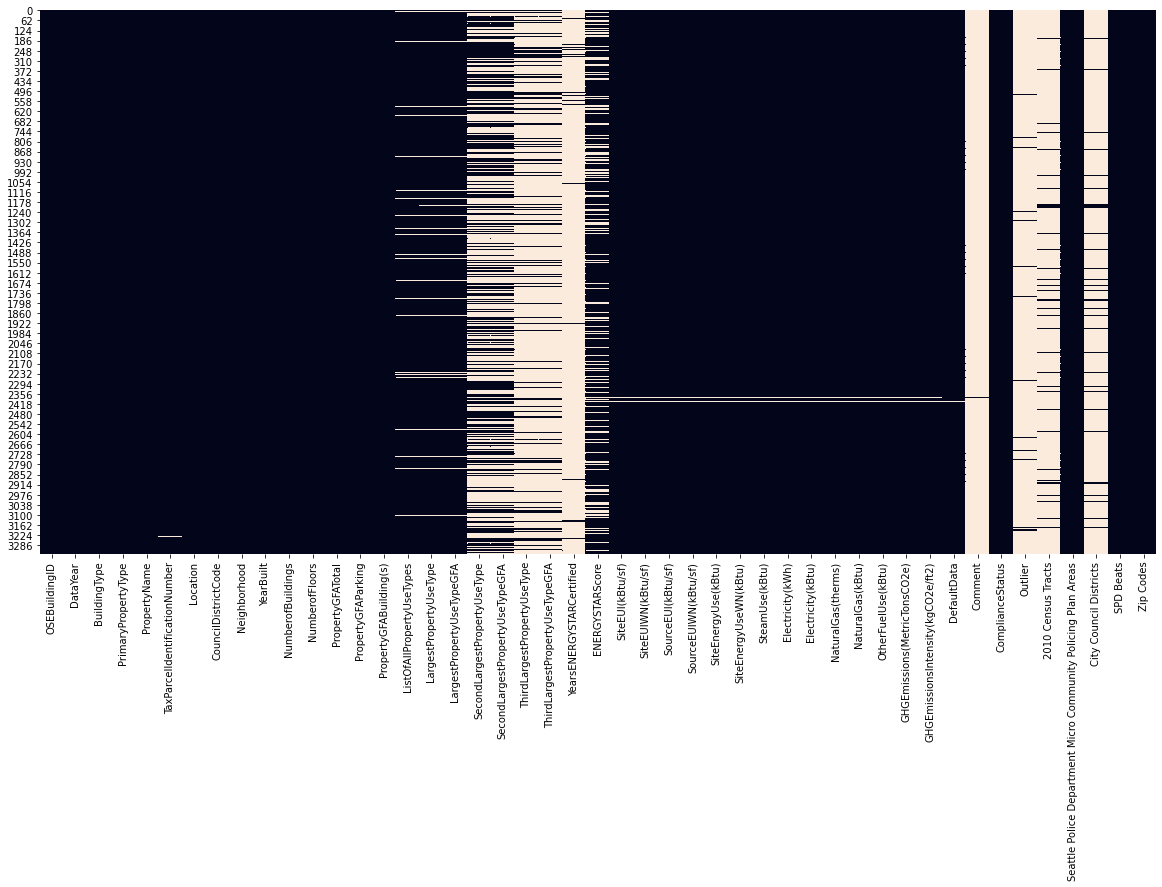

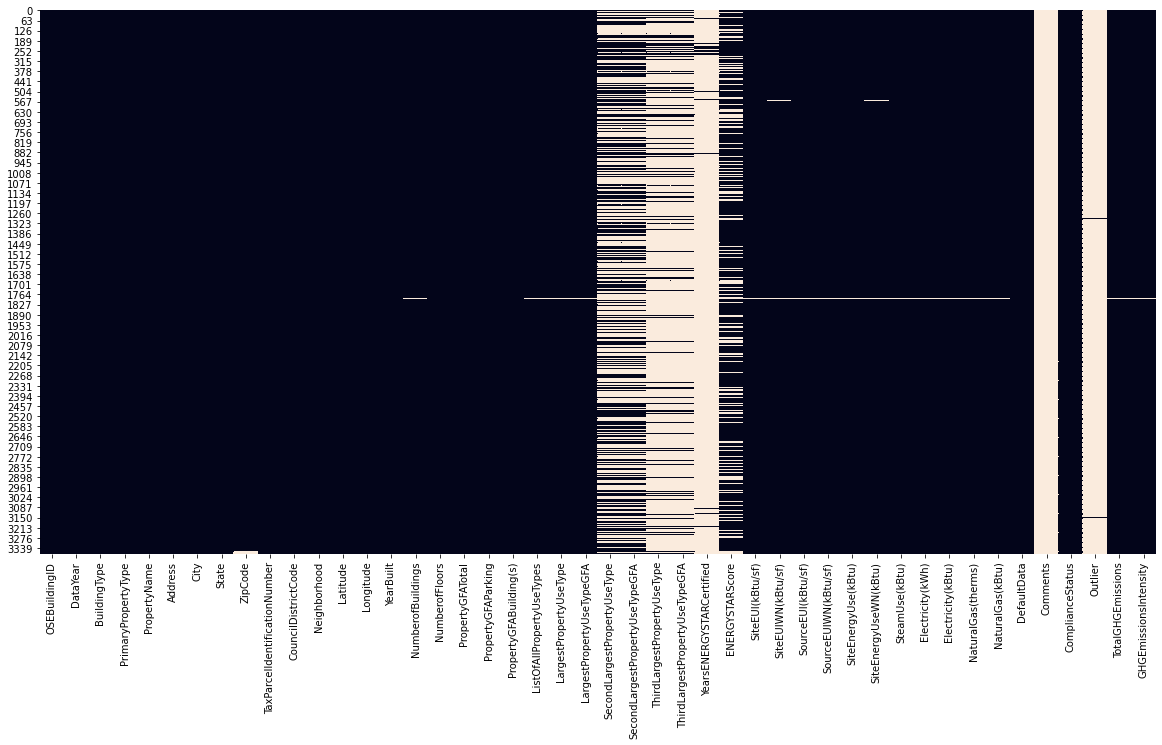

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df15.isna(), cbar=False)
plt.show()

plt.figure(figsize=(20,10))
sns.heatmap(df16.isna(),cbar=False)
plt.show()

In [14]:
percentage_nan_by_columns(df15)

OSEBuildingID                                                     0.00 %
ComplianceStatus                                                  0.00 %
PropertyGFABuilding(s)                                            0.00 %
PropertyGFAParking                                                0.00 %
PropertyGFATotal                                                  0.00 %
NumberofBuildings                                                 0.00 %
YearBuilt                                                         0.00 %
Neighborhood                                                      0.00 %
Zip Codes                                                         0.00 %
Location                                                          0.00 %
PropertyName                                                      0.00 %
PrimaryPropertyType                                               0.00 %
BuildingType                                                      0.00 %
DataYear                                           

In [15]:
percentage_nan_by_columns(df16)

OSEBuildingID                        0.00 %
PropertyGFABuilding(s)               0.00 %
PropertyGFAParking                   0.00 %
PropertyGFATotal                     0.00 %
NumberofFloors                       0.00 %
YearBuilt                            0.00 %
Longitude                            0.00 %
Latitude                             0.00 %
Neighborhood                         0.00 %
DefaultData                          0.00 %
CouncilDistrictCode                  0.00 %
ComplianceStatus                     0.00 %
State                                0.00 %
City                                 0.00 %
Address                              0.00 %
PropertyName                         0.00 %
PrimaryPropertyType                  0.00 %
BuildingType                         0.00 %
DataYear                             0.00 %
TaxParcelIdentificationNumber        0.00 %
SiteEnergyUse(kBtu)                  0.15 %
SiteEnergyUseWN(kBtu)                0.18 %
SiteEUIWN(kBtu/sf)              

**import fonctions pour exploration**

In [16]:
from math import ceil,sqrt,floor,pow


#Retourne un nombre x  de couleurs avec un espacement homogene contenus dans une colormap
def get_colors_from_listedcolormap(colormap, x):
    colors = []
    for i in range(0,x):
        if x <2:
            y=1
        else:
            y=i/(x-1)
        colors.append(COLORMAP.colors[floor((COLORMAP.N-1)*y)])
    return colors

#Retourne l'ensemble des labels du dataframe pour un certain dtype
def get_set_of_labels(dataframe,dtype):
    return {index for index, value in dataframe.dtypes.items() if value == dtype}

#Genere une grille carrée d'histogramme pour chaque variables de type dtype
def plot_sghisto(dataframe, dtype, color='', max_items=100, labels=[], title=''):        
    if not labels:
        if dtype == 'all':
            labels = dataframe.columns.values
        elif dtype == 'numbers':
            labels = get_set_of_labels(dataframe, 'float64')
            labels = labels.union(get_set_of_labels(dataframe, 'int64'))
        else:
            labels = get_set_of_labels(dataframe, dtype)
            
    labels_length = len(labels)
    dimension = ceil(sqrt(labels_length))
    dimension2 = int(pow(dimension,2))
    fig, axs = plt.subplots(dimension, dimension,figsize=(30,30))
    fig.suptitle(title, fontsize=32 , x=0.5,y=0.95)
    
    for i, value in enumerate(labels, start=0):
            x = floor(i/dimension)
            y = i - x*dimension
            if dataframe[value].dtype == 'object':
                df_index = dataframe[value].value_counts().index[:max_items]
                df_temp = dataframe[dataframe[value].isin(df_index.values)]
                sns.histplot(data=df_temp, x=value,color=color, discrete=True,ax=axs[x,y])
                ax= axs[x,y]
                ax.set_xticklabels([])
            if dataframe[value].dtype =='float64' or dataframe[value].dtype =='int64':
                sns.histplot(data=dataframe, x=value, color=color, ax= axs[x,y])
            ax= axs[x,y]
            ax.set_xlabel(f'{value[0:15]}', fontdict={'fontsize':18})
            ax.set_ylabel('')
            
    if dimension2 > labels_length:
        for i in range(labels_length,dimension2):
            x = floor(i/dimension)
            y = i - x*dimension
            axs[x,y].remove()

        
#Mes couleurs
COLORMAP = sns.color_palette("plasma", as_cmap=True)
COLORS = get_colors_from_listedcolormap(COLORMAP,5)
COLOR_PRIMARY = COLORS[0]
COLOR_SECONDARY = COLORS[1]
COLOR_TERTIARY = COLORS[4]
COLOR_QUATERNARY = COLORS[2]
COLOR_QUINARY = COLORS[3]

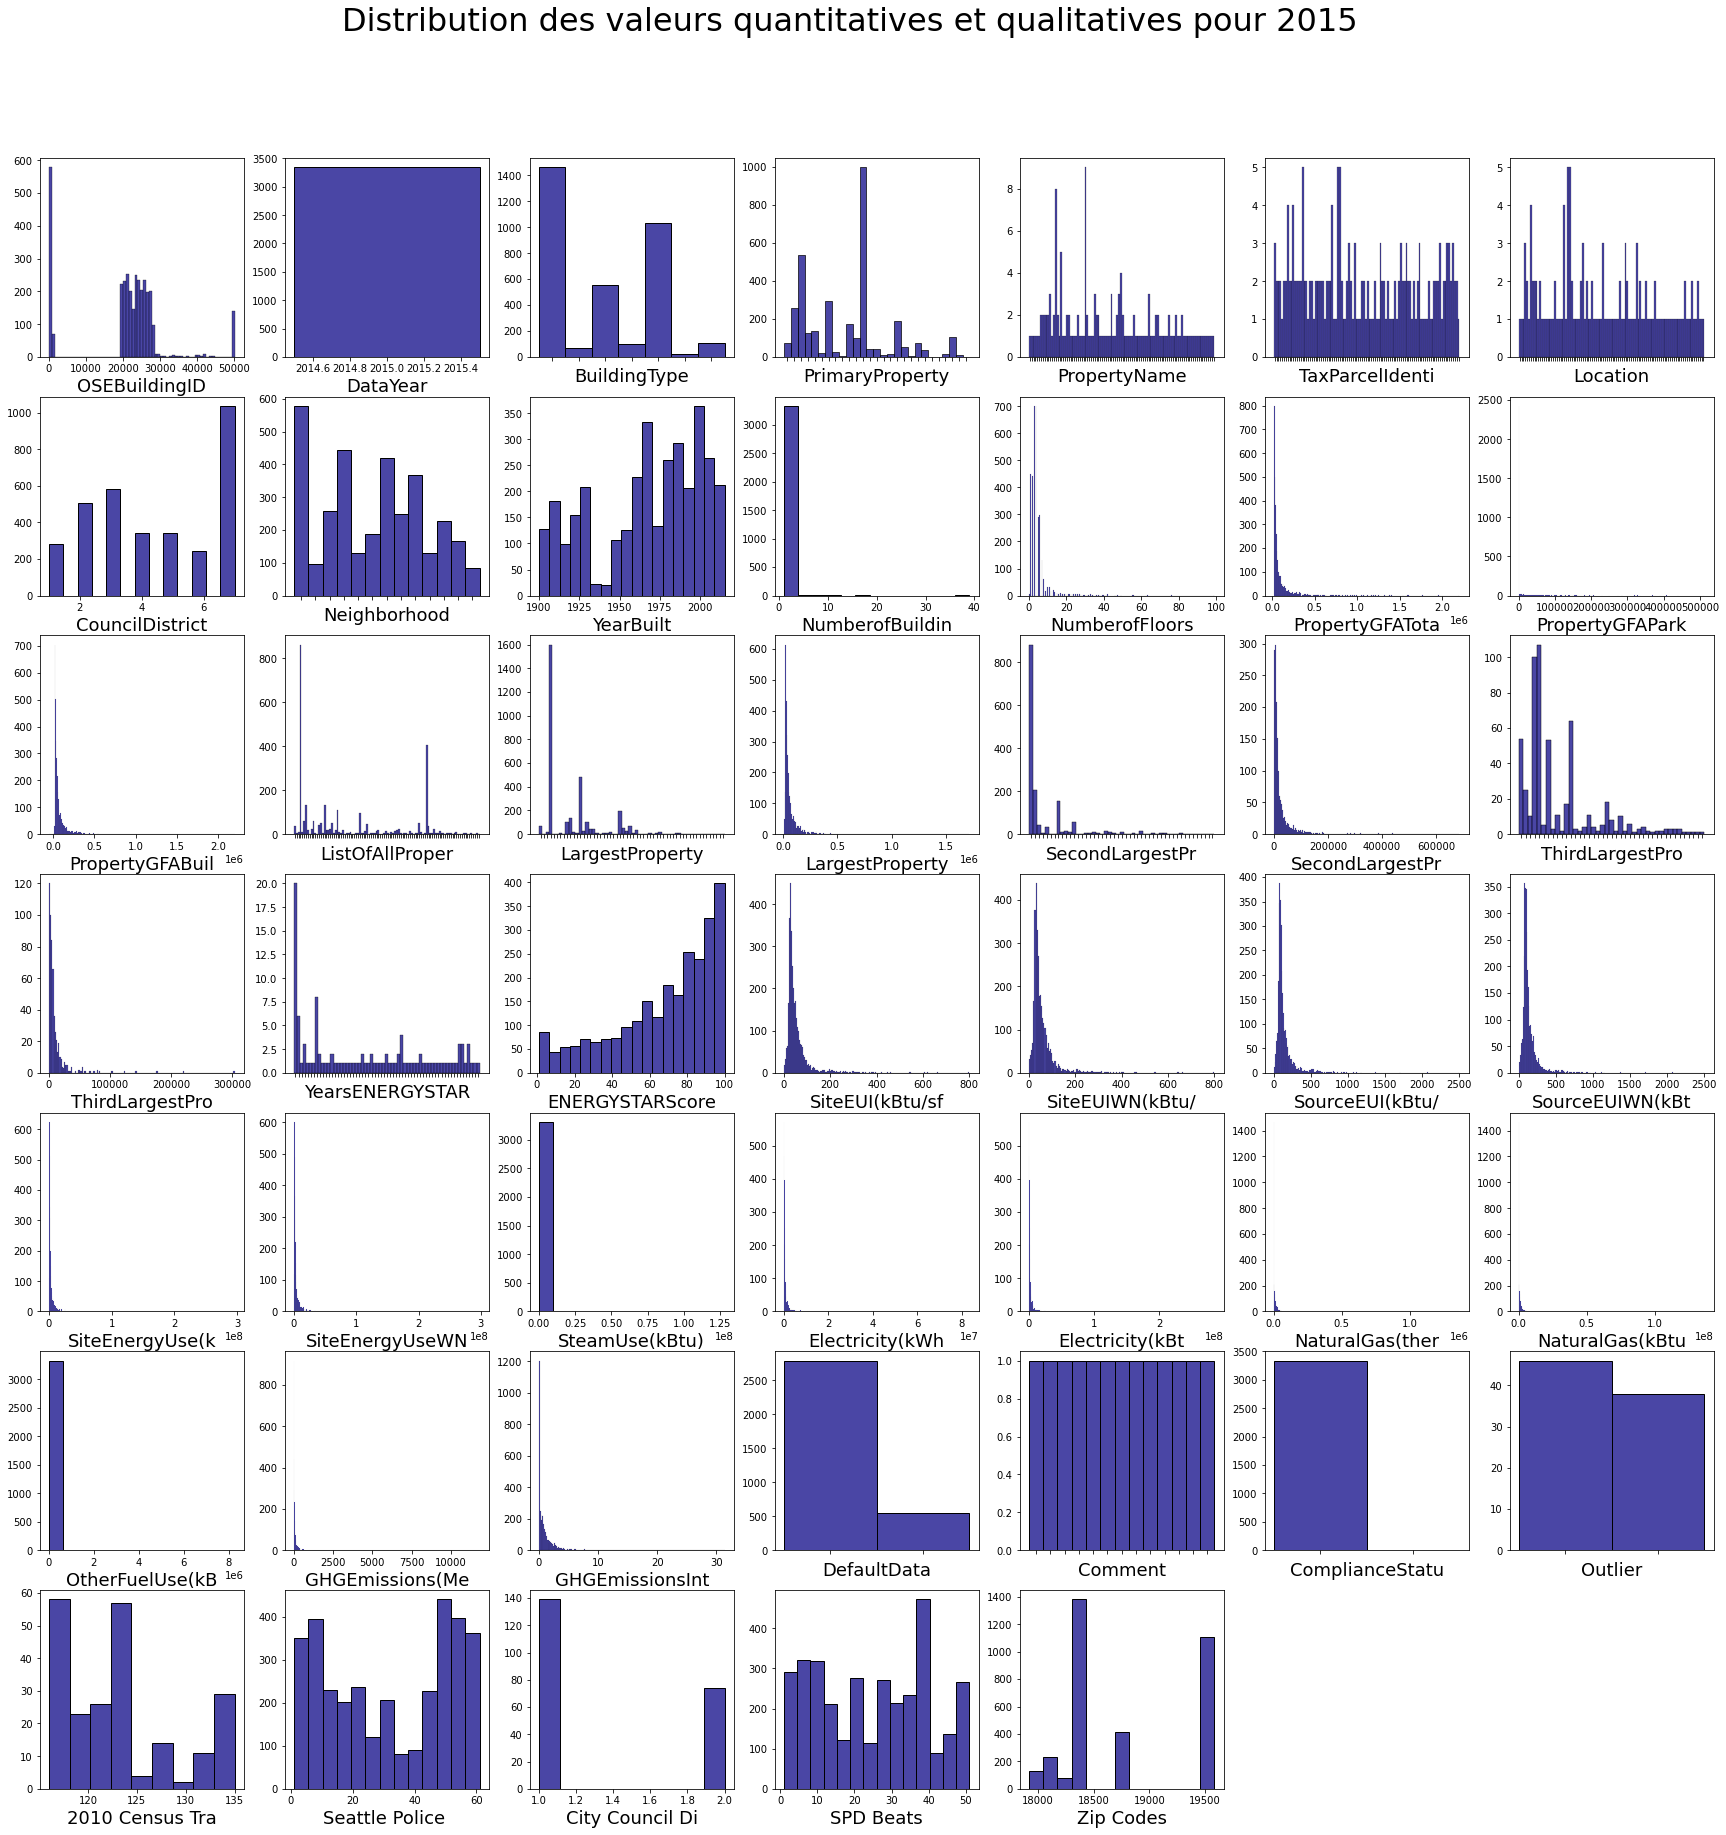

In [17]:
plot_sghisto(df15, dtype='all', title='Distribution des valeurs quantitatives et qualitatives pour 2015', color=COLOR_PRIMARY)

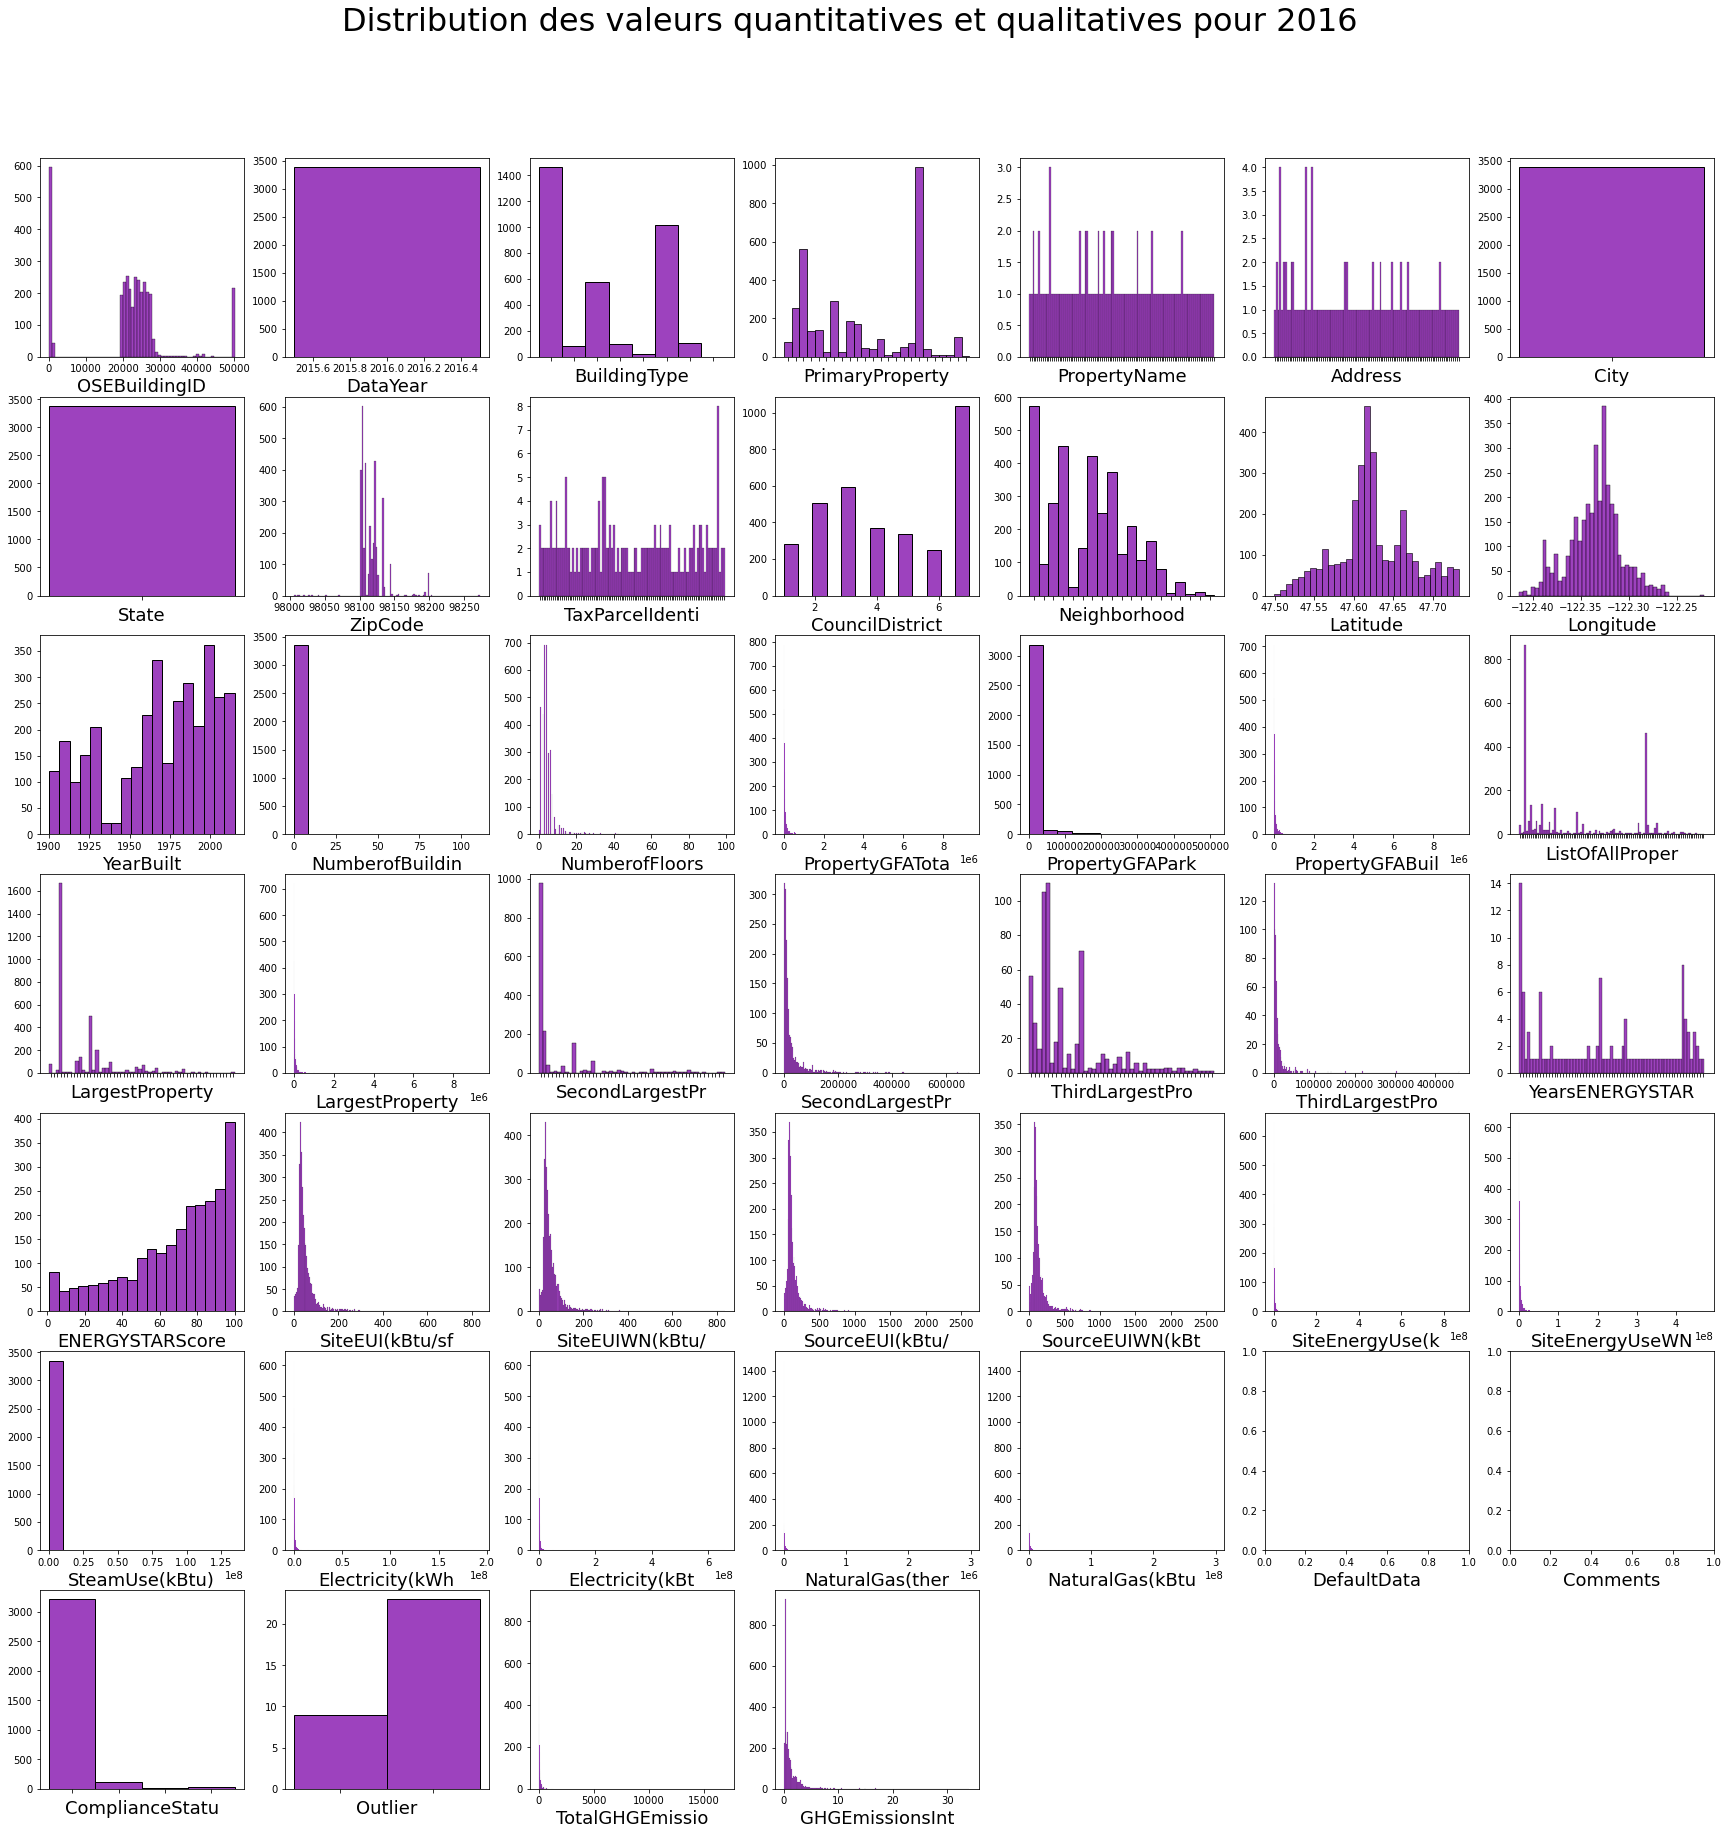

In [18]:
plot_sghisto(df16, dtype='all', title='Distribution des valeurs quantitatives et qualitatives pour 2016', color=COLOR_SECONDARY)

**Supprimer les outliers identifiés par la source**

In [19]:
#outlier pré-identifié dans le jeu de données
df16 = df16[df16['Outlier'].isna()]
df15 = df15[df15['Outlier'].isna()]
df16 = df16.drop('Outlier', axis=1)
df15 = df15.drop('Outlier', axis=1)

**Renommer les colonnes identiques**

In [20]:
df16 = df16.rename(columns = { "TotalGHGEmissions" :"GHGEmissions(MetricTonsCO2e)", "GHGEmissionsIntensity" : "GHGEmissionsIntensity(kgCO2e/ft2)"})

**Vérifier la cohérence entre 2015 et 2016**

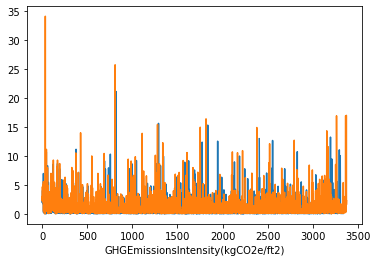

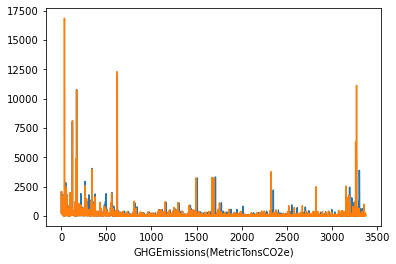

In [21]:
df15['GHGEmissionsIntensity(kgCO2e/ft2)'].plot()
df16['GHGEmissionsIntensity(kgCO2e/ft2)'].plot()
plt.xlabel('GHGEmissionsIntensity(kgCO2e/ft2)', fontdict={'fontsize':10})
plt.show()
df15['GHGEmissions(MetricTonsCO2e)'].plot()
df16['GHGEmissions(MetricTonsCO2e)'].plot()
plt.xlabel('GHGEmissions(MetricTonsCO2e)', fontdict={'fontsize':10})
plt.show()

In [22]:
df15.describe()/df16.describe()

,2010 Census Tracts,City Council Districts,Comments,CouncilDistrictCode,DataYear,ENERGYSTARScore,Electricity(kBtu),Electricity(kWh),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),LargestPropertyUseTypeGFA,Latitude,Longitude,NaturalGas(kBtu),NaturalGas(therms),NumberofBuildings,NumberofFloors,OSEBuildingID,OtherFuelUse(kBtu),PropertyGFABuilding(s),PropertyGFAParking,PropertyGFATotal,SPD Beats,Seattle Police Department Micro Community Policing Plan Areas,SecondLargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SteamUse(kBtu),ThirdLargestPropertyUseTypeGFA,YearBuilt,Zip Codes,ZipCode
count,NaN,NaN,NaN,0.973684,0.973684,0.992430,0.973913,0.973913,0.973913,0.973913,0.939230,NaN,NaN,0.973913,0.973913,0.976019,0.971292,0.973684,NaN,0.973684,0.973684,0.973684,NaN,NaN,0.911606,0.973329,0.973038,0.972746,0.973038,0.973913,0.973913,0.973913,0.921902,0.973684,NaN,NaN
mean,NaN,NaN,NaN,0.999735,0.999504,1.004840,0.930519,0.930480,0.904693,0.813942,0.946308,NaN,NaN,0.900423,0.900423,0.936853,0.993645,0.964785,NaN,0.917956,1.381975,0.957197,NaN,NaN,0.969872,0.963910,0.993933,0.913202,0.976781,0.976553,0.996152,0.887898,0.903917,0.999608,NaN,NaN
std,NaN,NaN,NaN,1.002343,NaN,0.993659,0.641715,0.641689,0.759299,0.841733,0.615212,NaN,NaN,0.660234,0.660234,0.375235,0.998925,0.938859,NaN,0.624314,1.094365,0.685191,NaN,NaN,0.966574,0.936912,0.953157,0.637464,0.880827,0.929635,0.927352,0.887924,0.772137,0.992193,NaN,NaN
min,NaN,NaN,NaN,1.000000,0.999504,1.000000,-0.000000,-0.000000,-0.000000,-0.000000,1.038190,NaN,NaN,NaN,NaN,inf,NaN,1.000000,NaN,-13.902640,-inf,1.772264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000000,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,1.000000,0.999504,0.981132,0.996295,0.996252,0.978509,0.380952,0.994125,NaN,NaN,NaN,NaN,1.000000,1.000000,0.996461,NaN,0.959879,NaN,0.998186,NaN,NaN,0.989700,0.975089,1.010169,0.982080,1.011520,0.985000,1.025413,NaN,1.013399,0.999615,NaN,NaN
50%,NaN,NaN,NaN,1.000000,0.999504,1.013333,0.980967,0.980927,0.946497,0.725806,0.981432,NaN,NaN,0.872973,0.873097,1.000000,1.000000,0.993466,NaN,0.956880,NaN,0.994401,NaN,NaN,0.990699,0.963824,0.997555,0.972074,1.008531,0.982884,1.013327,NaN,0.980392,0.999494,NaN,NaN
75%,NaN,NaN,NaN,1.000000,0.999504,1.000000,0.967612,0.967572,0.912700,0.846715,0.944761,NaN,NaN,0.911675,0.911677,1.000000,1.000000,0.989574,NaN,0.933547,inf,0.970236,NaN,NaN,0.979445,0.970199,1.004673,0.945125,0.984846,0.987139,1.007417,NaN,0.991480,0.999499,NaN,NaN
max,NaN,NaN,NaN,1.000000,0.999504,1.000000,0.433324,0.433306,0.700901,0.618950,0.184508,NaN,NaN,0.458021,0.458020,0.351351,1.000000,0.996675,NaN,0.236048,1.000000,0.236048,NaN,NaN,1.000000,0.959492,0.959492,0.338488,0.631324,0.958435,0.958397,0.947580,0.661036,1.000000,NaN,NaN


Le rapport des moyennes pour chaques variables quantitatives entre les deux jeux de données est approximativement de 1 ce qui indique une cohérence dans les unités et certainement la distribution

In [23]:
print('Différence types : \n')
for col in df15.columns:
    if col in df16.columns:
        if df15[col].dtypes != df16[col].dtype :
            print(f"Attention à {df15[col].name} : {df15[col].dtypes} - {df16[col].dtypes}")

Différence types : 

Attention à NumberofBuildings : int64 - float64
Attention à NumberofFloors : float64 - int64
Attention à DefaultData : object - bool


**Assembler les deux ensembles de données**   
On ne garde que l'intersection, les colonnes de géolocalisation sont redondantes avec le quartier. A examiner si le quartier est une variable importante. Les autres ne sont pas dans le permis d'exploitation.

In [24]:
df = pd.concat([df16,df15],
               axis=0,
               join='inner',
               ignore_index=True,
               keys=None,
               levels=None,
               names=None,
               verify_integrity=False,
               copy=True)

**Vérifier les valeurs qualitatives**

In [25]:
for col in df.columns:
    if df[col].nunique()<30:
        print(f'{col} : \n {df[col].unique()}')
    else:
        print(f'{col} : \n {df[col].nunique()}')

OSEBuildingID : 
 3408
DataYear : 
 [2016 2015]
BuildingType : 
 ['NonResidential' 'Nonresidential COS' 'Multifamily MR (5-9)'
 'SPS-District K-12' 'Campus' 'Multifamily LR (1-4)'
 'Multifamily HR (10+)' 'Nonresidential WA']
PrimaryPropertyType : 
 32
PropertyName : 
 6417
TaxParcelIdentificationNumber : 
 3695
CouncilDistrictCode : 
 [7 3 2 4 5 6 1]
Neighborhood : 
 ['DOWNTOWN' 'SOUTHEAST' 'NORTHEAST' 'EAST' 'Central' 'NORTH'
 'MAGNOLIA / QUEEN ANNE' 'LAKE UNION' 'GREATER DUWAMISH' 'BALLARD'
 'NORTHWEST' 'CENTRAL' 'SOUTHWEST' 'DELRIDGE' 'Ballard' 'North' 'Delridge'
 'Northwest' 'DELRIDGE NEIGHBORHOODS']
YearBuilt : 
 113
NumberofBuildings : 
 [  1.   3.   0.   2.   4.  27.   6.  11.  14.   9.  nan   7.   5.   8.
  16.  23.  10. 111.  39.]
NumberofFloors : 
 50
PropertyGFATotal : 
 3272
PropertyGFAParking : 
 950
PropertyGFABuilding(s) : 
 3694
ListOfAllPropertyUseTypes : 
 484
LargestPropertyUseType : 
 57
LargestPropertyUseTypeGFA : 
 3305
SecondLargestPropertyUseType : 
 50
SecondLa

**Remplacer les valeurs quantitatives identiques ayant un label different**

In [26]:
df['Neighborhood'] = df['Neighborhood'].apply(lambda x: x.capitalize())
df['Neighborhood'].replace('Delridge neighborhoods', 'Delridge', inplace=True)

**Supprimer les valeurs abberantes identifiables**

In [27]:
#batiment ne peut être nul
df = df[df['NumberofBuildings'] != 0]

In [28]:
df.shape

(6508, 38)

In [29]:
#les valeurs des variables quantitatives ne peuvent être négatives
df = df[~(df.select_dtypes(include=["number"]) < 0).any(axis='columns')]

In [30]:
# hypothese : tous les batiments ont une consommation electrique et une émission de c02 non nulle (log)
df = df[df['GHGEmissions(MetricTonsCO2e)'] != 0]
df = df[df['SiteEnergyUseWN(kBtu)'] != 0]

In [31]:
df.shape

(6460, 38)

In [32]:
df.isna().sum().sort_values(ascending=False)

YearsENERGYSTARCertified             6242
ThirdLargestPropertyUseType          5360
ThirdLargestPropertyUseTypeGFA       5360
SecondLargestPropertyUseTypeGFA      3347
SecondLargestPropertyUseType         3347
ENERGYSTARScore                      1541
LargestPropertyUseType                153
LargestPropertyUseTypeGFA             153
ListOfAllPropertyUseTypes             134
SourceEUI(kBtu/sf)                     17
GHGEmissions(MetricTonsCO2e)           17
GHGEmissionsIntensity(kgCO2e/ft2)      17
SourceEUIWN(kBtu/sf)                   17
SteamUse(kBtu)                         17
NaturalGas(therms)                     17
Electricity(kBtu)                      17
Electricity(kWh)                       17
NaturalGas(kBtu)                       17
SiteEnergyUseWN(kBtu)                  14
SiteEUIWN(kBtu/sf)                     14
SiteEnergyUse(kBtu)                    13
SiteEUI(kBtu/sf)                       13
NumberofFloors                          8
NumberofBuildings                 

In [33]:
df.describe()

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
count,6460.000000,6460.000000,6460.000000,6460.000000,6452.000000,6452.000000,6.460000e+03,6460.000000,6.460000e+03,6.307000e+03,3113.000000,1100.000000,4919.000000,6447.000000,6446.000000,6443.000000,6443.000000,6.447000e+03,6.446000e+03,6.443000e+03,6.443000e+03,6.443000e+03,6.443000e+03,6.443000e+03,6443.000000,6443.000000
mean,20853.322910,2015.498452,4.443808,1968.366409,1.070521,4.684594,9.093606e+04,9537.194272,8.139887e+04,7.537543e+04,27539.154287,10769.719453,68.006709,53.618086,56.962178,132.551498,137.925485,5.021527e+06,5.245294e+06,2.471002e+05,1.014743e+06,3.462373e+06,1.304996e+04,1.304995e+06,112.518530,1.062885
std,11791.021283,0.500036,2.119535,32.863357,0.864652,5.458985,1.479715e+05,33921.600384,1.296253e+05,1.228329e+05,51688.689563,24357.209779,26.616761,53.581411,54.865236,132.710259,132.244796,1.482373e+07,1.517366e+07,3.598115e+06,2.819148e+06,9.619128e+06,5.767301e+04,5.767301e+06,465.310548,1.652753
min,1.000000,2015.000000,1.000000,1900.000000,1.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.200000,0.200000,0.000000,0.000000,1.144100e+04,1.144100e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.080000,0.000000
25%,19974.250000,2015.000000,3.000000,1948.000000,1.000000,2.000000,2.844600e+04,0.000000,2.726600e+04,2.501850e+04,4900.000000,2351.000000,52.000000,27.800000,29.800000,74.649998,80.099998,9.301593e+05,9.968681e+05,0.000000e+00,1.885686e+05,6.433960e+05,0.000000e+00,0.000000e+00,9.510000,0.160000
50%,23064.500000,2015.000000,4.000000,1974.000000,1.000000,4.000000,4.388400e+04,0.000000,4.208100e+04,3.946900e+04,10631.000000,5000.000000,75.000000,38.000000,40.950001,95.599998,102.200000,1.783195e+06,1.929810e+06,0.000000e+00,3.419570e+05,1.166757e+06,3.101530e+03,3.101530e+05,33.220000,0.540000
75%,25851.250000,2016.000000,7.000000,1997.000000,1.000000,5.000000,8.923875e+04,0.000000,8.087400e+04,7.356300e+04,26243.000000,10095.000000,90.000000,59.400002,64.400000,142.399994,148.650000,4.079088e+06,4.359804e+06,0.000000e+00,8.150814e+05,2.781116e+06,1.131463e+04,1.131463e+06,89.525000,1.270000
max,50226.000000,2016.000000,7.000000,2015.000000,39.000000,99.000000,2.200000e+06,512608.000000,2.200000e+06,1.719643e+06,686750.000000,459748.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,4.483853e+08,4.716139e+08,1.349435e+08,8.344505e+07,2.847263e+08,2.979090e+06,2.979090e+08,16870.980000,34.090000


**Supprimer les colonnes qui ne sont pas utiles ou accessibles pour le permis d'exploitation (sauf targets)**

In [34]:
columns_to_drop = [ 
                    'DataYear',
                    'OSEBuildingID',
                    'ComplianceStatus',
                    'PropertyName',
                    'TaxParcelIdentificationNumber',
                    'YearsENERGYSTARCertified',
                    'ListOfAllPropertyUseTypes', 
                    'DefaultData',
                    'SourceEUI(kBtu/sf)',
                    'GHGEmissionsIntensity(kgCO2e/ft2)',
                    'SourceEUIWN(kBtu/sf)',
                    'SteamUse(kBtu)',
                    'NaturalGas(therms)',
                    'Electricity(kBtu)',
                    'Electricity(kWh)',
                    'NaturalGas(kBtu)',
                    'SiteEUI(kBtu/sf)',
                    'SiteEUIWN(kBtu/sf)',
                    'SiteEnergyUse(kBtu)',
                    'SecondLargestPropertyUseType',
                    'ThirdLargestPropertyUseType'
                  ]

In [35]:
df.drop(columns_to_drop, axis=1, inplace=True)

In [36]:
df.dropna(subset=['GHGEmissions(MetricTonsCO2e)','SiteEnergyUseWN(kBtu)'] , axis=0 , inplace=True)

**Imputation de certaines valeurs manquantes**

In [37]:
df.fillna({'LargestPropertyUseTypeGFA':0, 'SecondLargestPropertyUseTypeGFA':0 , 'ThirdLargestPropertyUseTypeGFA':0, 'PropertyGFAParking':0}, inplace=True)

In [38]:
energyscore = df['ENERGYSTARScore']
df = df.loc[:, ~df.columns.isin(['ENERGYSTARScore'])].dropna()
df['ENERGYSTARScore'] = energyscore

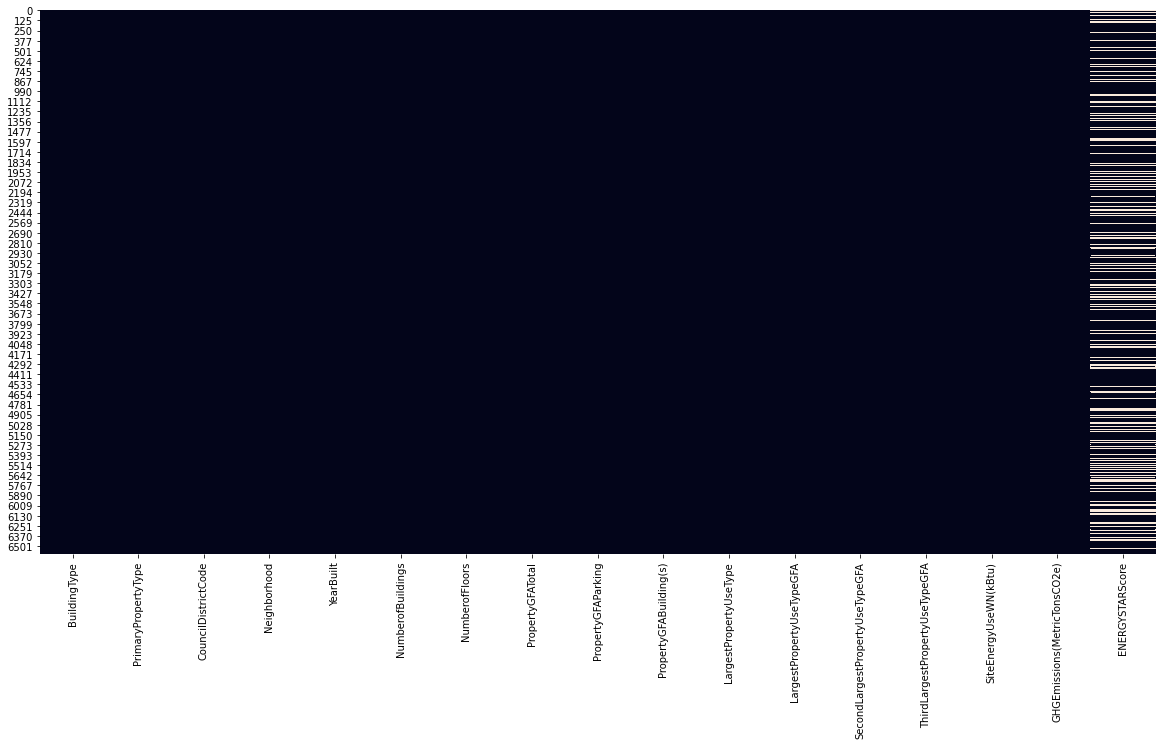

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)
plt.show()

In [40]:
#sns.pairplot(df)

<AxesSubplot:title={'center':'Matrice de corrélation'}>

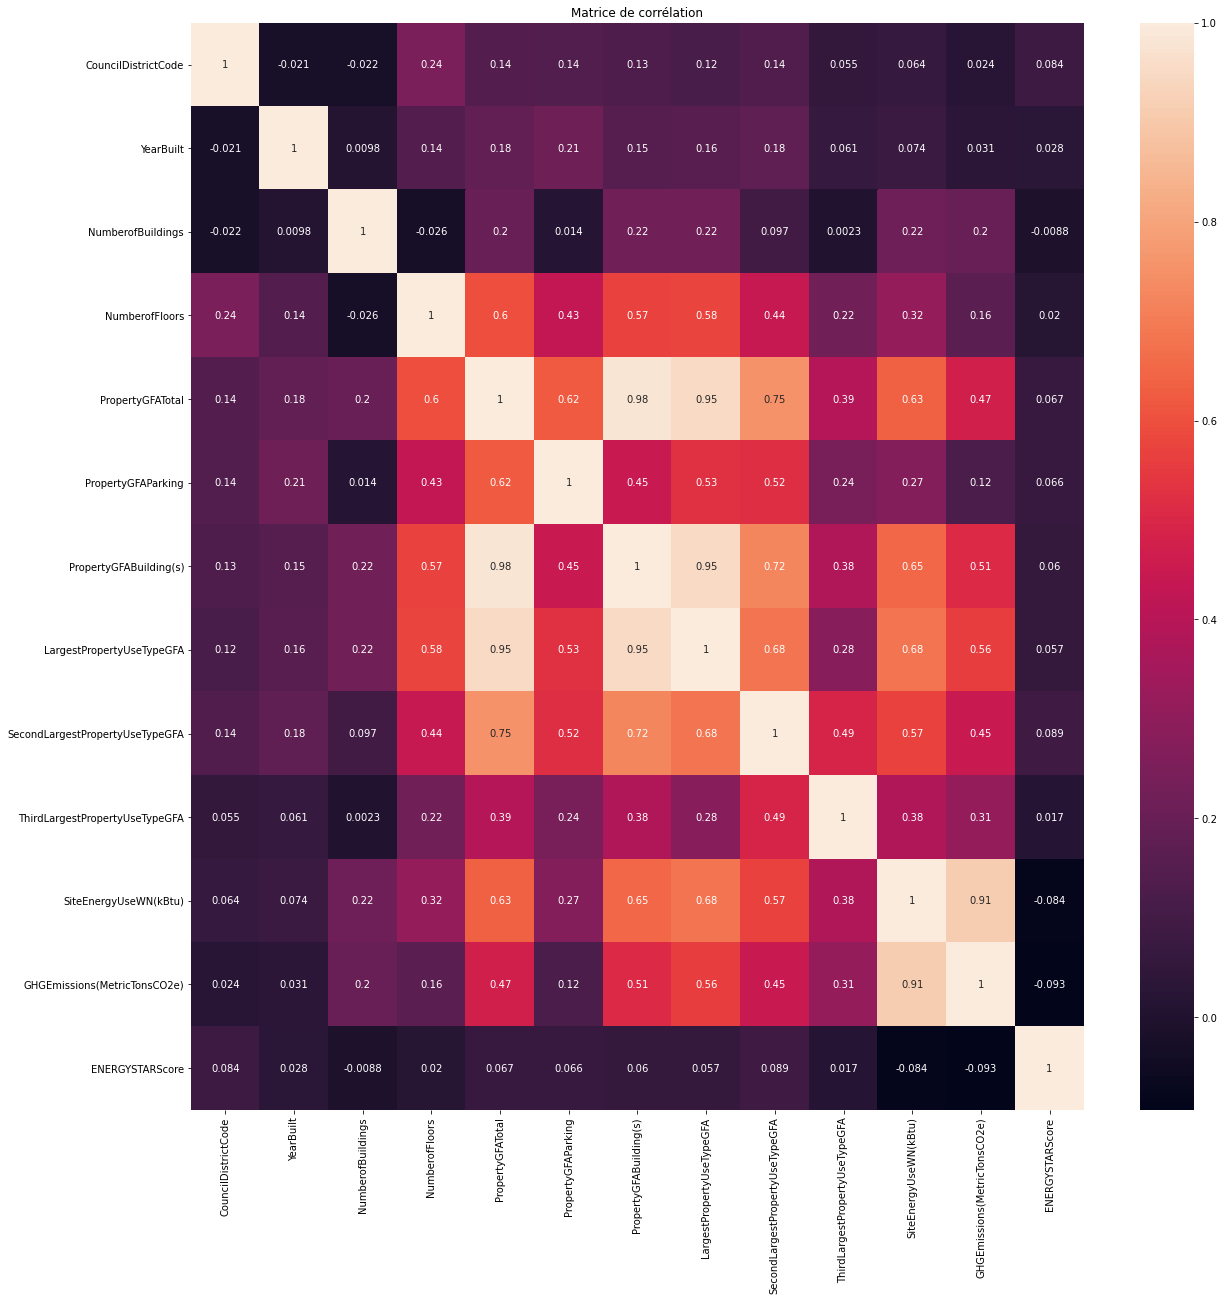

In [41]:
plt.figure(figsize=(20,20))
plt.title("Matrice de corrélation")
sns.heatmap(df.corr(),annot=True)

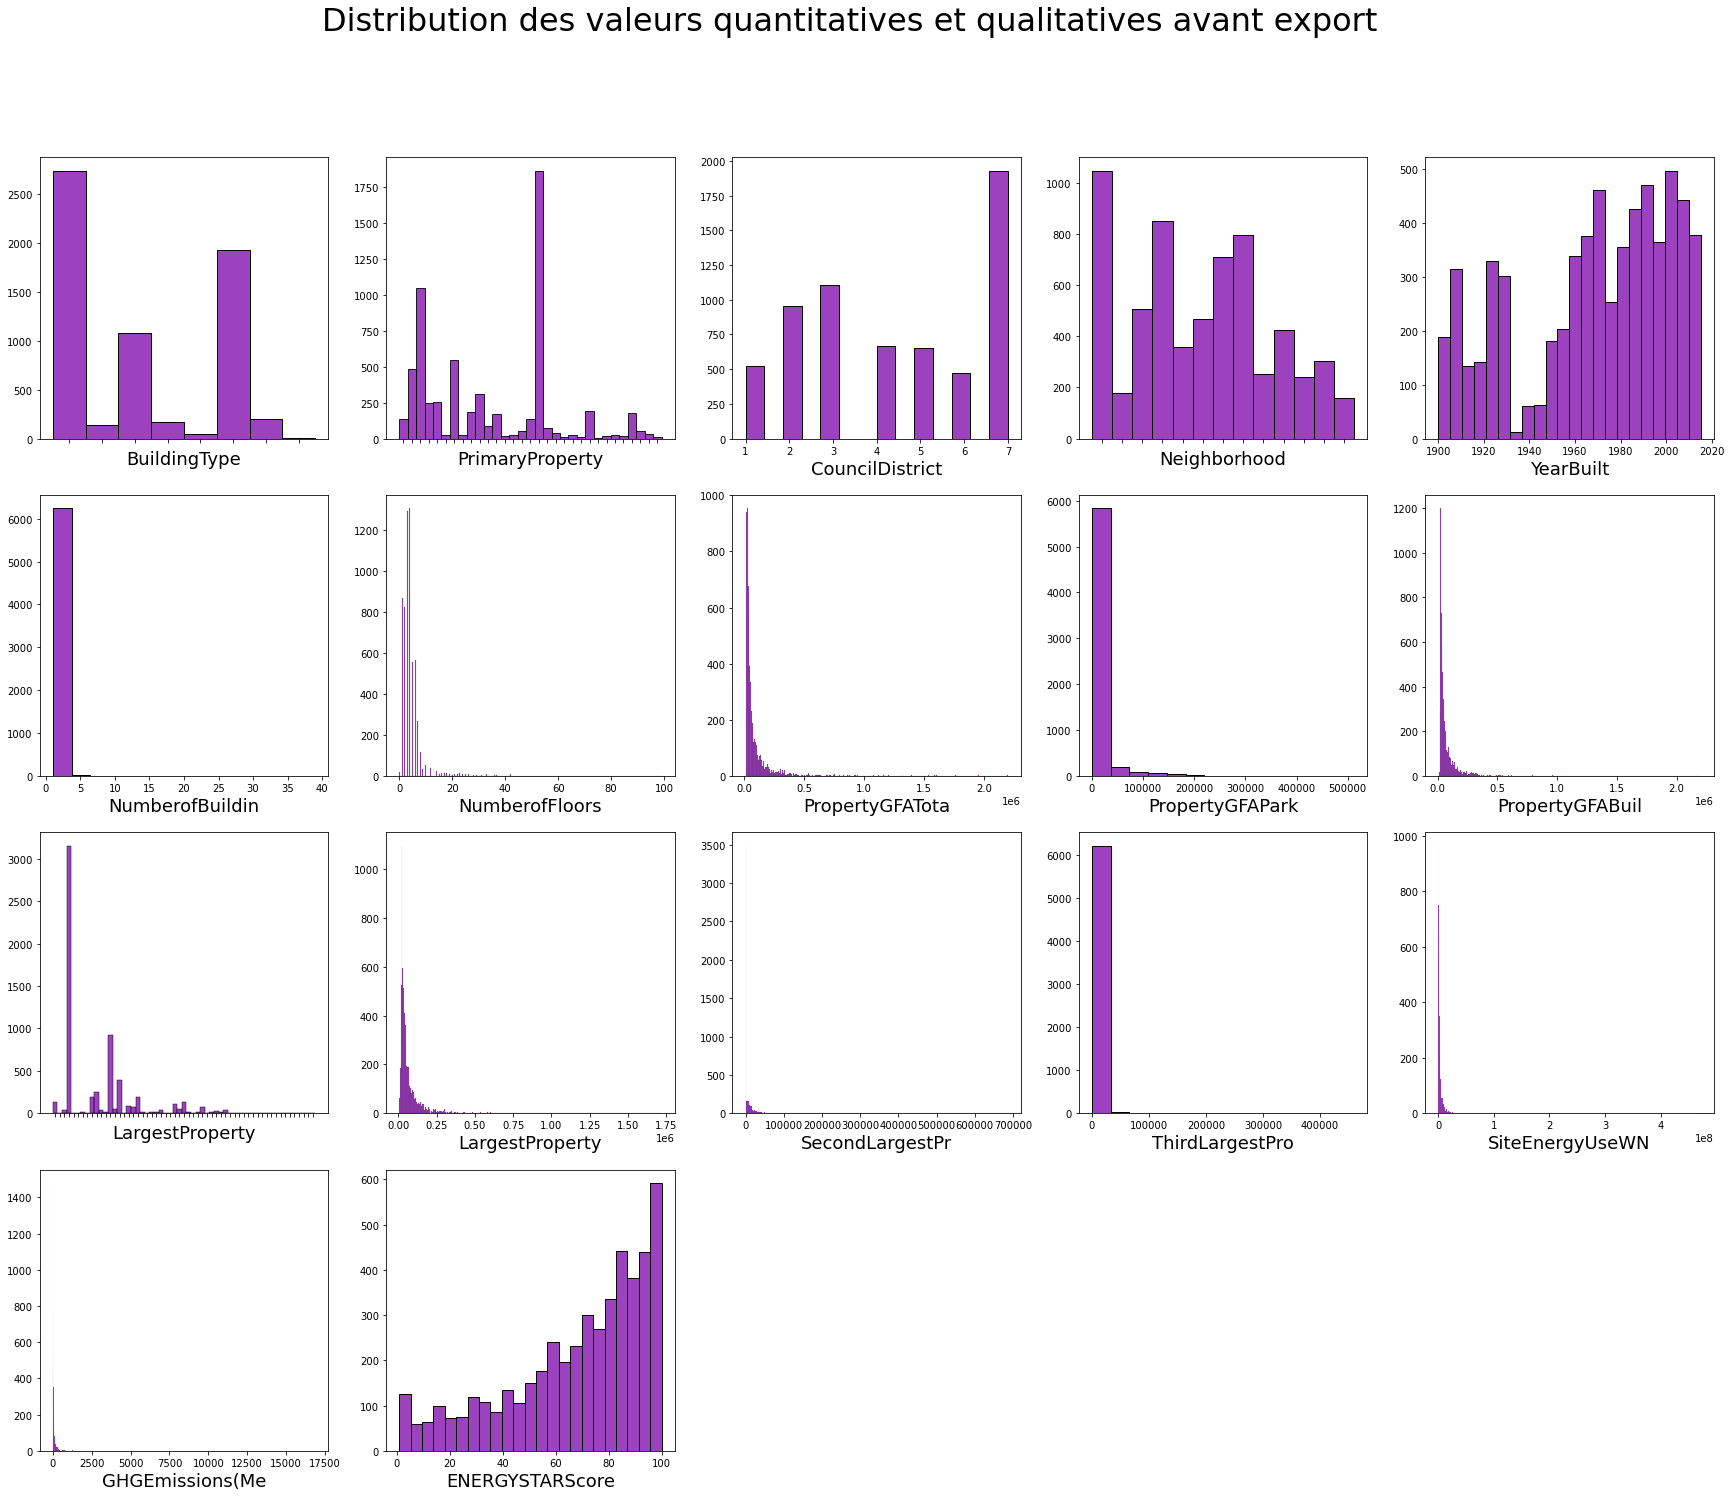

In [42]:
plot_sghisto(df, dtype='all', title='Distribution des valeurs quantitatives et qualitatives avant export', color=COLOR_SECONDARY)

In [43]:
df.shape

(6293, 17)

In [44]:
df.to_csv("data/df.csv")